In [2]:
import json
import seaborn as sns
sns.set_theme()
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio   
pio.kaleido.scope.mathjax = None

In [3]:
band_name = 'label'
band = 'built'
def load_df(band, band_name):
    feature_list = json.load(open(f'app/data/Bangalore Urban/{band}/areas.json', 'r'))
    if(band == 'electricity'):
        areas = (np.array([i.get('properties').get(band_name) for i in feature_list]))
    else:
        areas = (np.array([i.get('properties').get(band_name) for i in feature_list])*20)**2
    month_data = np.array([i.get('properties').get('month') for i in feature_list])
    year_data = np.array([i.get('properties').get('year') for i in feature_list])
    df = pd.DataFrame({"year": year_data, "month": month_data, "areas": areas})
    df['date'] = pd.to_datetime(dict(year=df.year, month=df.month, day = 1))
    df.set_index('date', inplace=True)
    if(band!='electricity'):
        df = df.resample('MS').asfreq()
        df.fillna(method='ffill', inplace=True)
    df.month = df.index.month
    df.year = df.index.year
    return df

df = load_df(band, band_name)

In [78]:
df_filtered = df[df.month.isin([1,2,3])]
fig = px.line(df_filtered, x = 'year', y = 'areas', color = 'month')
fig.write_image(f"results/{band}/monthly_spring.eps")
fig

In [74]:
df_filtered = df[df.month.isin([9, 10])]
fig = px.line(df_filtered, x = 'year', y = 'areas', color = 'month')
fig.write_image(f"results/{band}/monthly_sep_oct.eps")
fig

In [65]:
df_filtered = df[df.month.isin([11, 12])]
fig = px.line(df_filtered, x = 'year', y = 'areas', color = 'month')
fig.write_image(f"results/{band}/monthly_dec.eps")
fig

In [81]:
# unique_year = np.sort(np.unique(year_data))[1:]
# months_box = [True, True, True, True, False, False, False, False, False, False, False, False]
# yearly_data = [np.mean(df[df.year==i].areas[months_box[0:(df.year==i).sum()]]) for i in unique_year]
# fig = px.line(x=unique_year, y=yearly_data)
# # fig.write_image(f"results/{band}/yearly.eps")
# fig

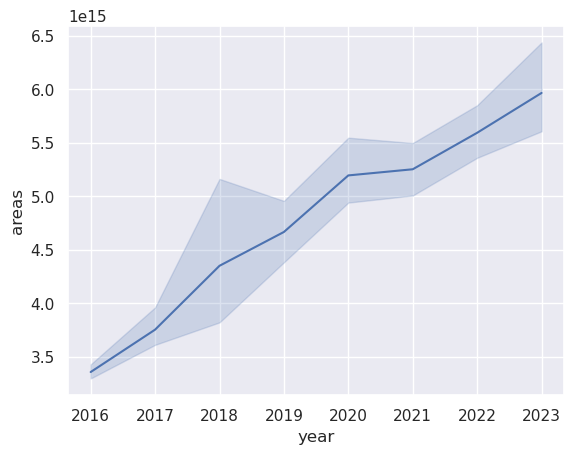

In [17]:
df_filtered = df[df.month.isin([1,2,3,4])]
sns_plot = sns.lineplot(df_filtered, x = 'year', y = 'areas', estimator='mean')
fig = sns_plot.get_figure()
# fig.savefig(f"results/{band}/yearly.pdf")

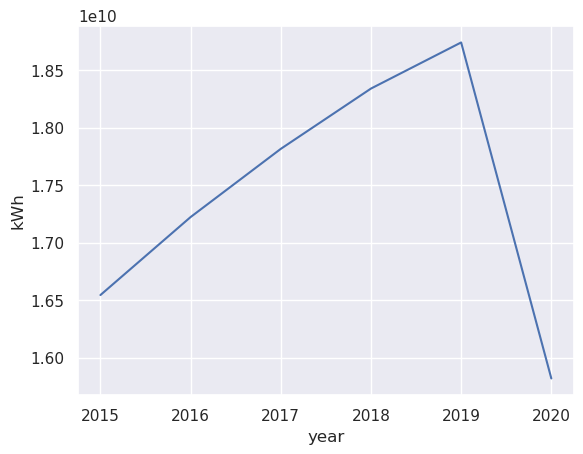

In [4]:
df_electricity = load_df('electricity', band_name)
# if band == 'electricity':
df_electricity.rename(columns = {'areas':'kWh'}, inplace = True)
sns_plot = sns.lineplot(df_electricity, x = 'year', y = 'kWh', estimator='mean')
fig = sns_plot.get_figure()
fig.savefig(f"results/electricity/yearly.pdf")

In [45]:
df_scaled = df_filtered.copy()
df_scaled['areas'] = df_scaled['areas']/(1e9)

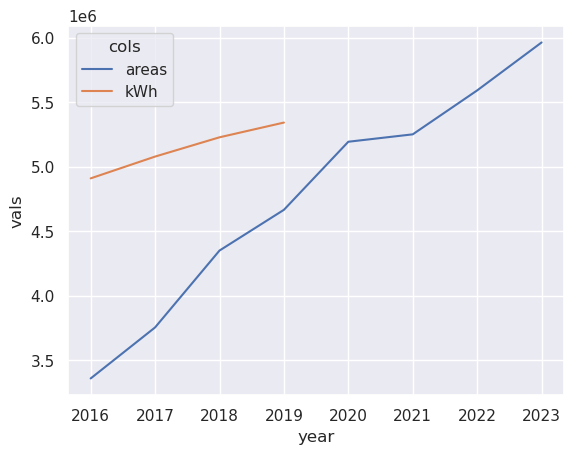

In [46]:
merged_df = df_scaled.groupby(['year']).mean().reset_index().assign(month=1).merge(df_electricity, how = 'left', on=['year', 'month'])
dfm = merged_df.drop(['month'], axis = 1).melt('year', var_name='cols', value_name='vals')
sns_plot=sns.lineplot(x="year", y="vals", hue='cols', data=dfm)
fig = sns_plot.get_figure()
# fig.savefig(f"results/electricity/compare_built.pdf")